# Self Organizing Map

## Install MiniSom Package

In [1]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=95d44a415702fbb84133344deee9438da04ce0083a045d9bd679d22f9680b352
  Stored in directory: c:\users\georg\appdata\local\pip\cache\wheels\b2\b8\f9\08876fa31be00070d6a60686b9842e044d1a9b471e8d6772d4
Successfully built MiniSom


### Importing the libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

## Feature Scaling


In [9]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
X = sc.fit_transform(X)

## Training the SOM


In [32]:
from minisom import MiniSom
som = MiniSom(x=10, y=10, input_len=15, sigma=1.0, learning_rate=0.2)
som.random_weights_init(X)
som.train_random(data=X, num_iteration=100)

## Visualizing the results


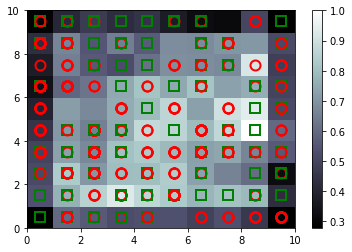

In [33]:
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor=colors[y[i]],
         markerfacecolor='None',
         markersize=10,
         markeredgewidth=2)
show()

## Finding the frauds


In [34]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(1,1)], mappings[(4,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

## Printing the Fraunch Clients

In [ ]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
0
0
0
0
0
0
0
0
0
0
